In [872]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from yahoofinancials import YahooFinancials
from yahooquery import Ticker
from yahooquery import screener

In [873]:
print('Ratios presented')
print('Leverage')
print(' :Debt to Assets')
print(' :Debt to Equity')
print(' :Asset to Equity')
print('Profitability')
print(' :Gross Profit Margin')
print(' :Return on Equity')
print(' :Return on Assets')
print(' :Operating Profit Margin')
print('Coverage')
print(' :Interest Coverage')
print(' :Cash Coverage')
print(' :Asset Coverage')
print('Liquidity')
print(' :Current Ratio')
print(' :Cash Ratio')

Ratios presented
Leverage
 :Debt to Assets
 :Debt to Equity
 :Asset to Equity
Profitability
 :Gross Profit Margin
 :Return on Equity
 :Return on Assets
 :Operating Profit Margin
Coverage
 :Interest Coverage
 :Cash Coverage
 :Asset Coverage
Liquidity
 :Current Ratio
 :Cash Ratio


In [874]:
#Equity Ticker to compare
t1 = 'msft'
t2 = 'tsla'
t3 = 'gm'

In [875]:
#Ticker to analyze
ticker = Ticker(t1)
#get balance sheet for ticker
ticker_Bal = ticker.balance_sheet()
#ticker_Bal['Date'] = ticker_Bal['asOfDate'].dt.strftime('%m-%Y') 
#ticker_Bal['Date'] = ticker_Bal['asOfDate'].dt.strftime('%m-%Y')
#Get cash flow for ticker
ticker_cash = ticker.cash_flow()
#ticker_cash['Date'] = ticker_cash['asOfDate'].dt.strftime('%m-%Y')
#Get income statement for ticker
ticker_income = ticker.income_statement()
#ticker_income['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')
#Print the col(series) for the balance sheet
#for col in ticker_Bal.columns:
     #print(col)

In [876]:
#Create a DF of the financial statements
df = [ticker_Bal,ticker_cash,ticker_income]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined = pd.concat(df)
#print(df_joined['Date'])

In [877]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined['Debt/Assets'] = (df_joined['TotalDebt'] / df_joined['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined['Debt/Equity'] = (df_joined['TotalDebt'] / df_joined['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined['Asset/Equity'] = (df_joined['TotalAssets'] / df_joined['StockholdersEquity'])
#print(df_joined[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))
print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity = df_joined['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined['Gross_Margin'] = ((df_joined['TotalRevenue'] - df_joined['CostOfRevenue']) / df_joined['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
df_joined['ROE'] = (df_joined['NetIncome'] / avg_share_equity)*100
ticker_income['ROE'] = (ticker_income['NetIncome'] / avg_share_equity) *100
#print(ticker_income[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined['Operating_Margin'] = (df_joined['EBIT'] / df_joined['TotalRevenue'])*100
#Print the results
#print(df_joined[['asOfDate','Gross_Margin','ROE','Operating_Margin']].tail(6))
#ROA breakdown
ROA = (ticker_income['NetIncome'] / ticker_Bal['TotalAssets']) *100
#previous 6 quarters
#print(ROA.tail(6))
print('Coverage Ratios')
df_joined['Interest_coverage'] = (df_joined['EBIT'] / df_joined['InterestExpense'])
#print(df_joined[['asOfDate','Interest_coverage']].tail(6))
#Cash_Coverage
ticker_income['Cash_coverage'] = (ticker_income['EBIT'] + ticker_income['ReconciledDepreciation'])/ ticker_income['InterestExpense']
#print(ticker_income[['asOfDate','Cash_coverage']])
ticker_Bal['Asset_coverage'] = (ticker_Bal['TotalAssets'] - ticker_Bal['CurrentLiabilities'] )/ ticker_Bal['TotalDebt']
#print(ticker_Bal[['asOfDate','Asset_coverage']])
print('Liquidity Ratios')
df_joined['Current_ratio'] = df_joined['CurrentAssets'] / df_joined['CurrentLiabilities']
df_joined['Cash_ratio'] = df_joined['CashAndCashEquivalents'] / df_joined['CurrentLiabilities'] * 100
#print(df_joined[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Leverage Ratios
Profitability
Coverage Ratios
Liquidity Ratios


In [878]:
#Print the col(series) for the cash flow
#for col in ticker_cash.columns:
     #print(col)

In [879]:
#Print the col(series) for the income statement
#for col in ticker_income.columns:
     #print(col)

In [880]:
#Print the series of the joined DF
#for col in df_joined.columns:
     #print(col)

In [881]:
#plt.plot(df_joined3['asOfDate'],df_joined3['Debt/Assets'])
#plt.xlabel('Date')
#plt.ylabel('Debt to Assets')

In [882]:
#plt.plot(df_joined['asOfDate'],df_joined['Debt/Equity'])
#plt.xlabel('Date')
#plt.ylabel('Debt to Equity')

In [883]:
#plt.plot(df_joined['asOfDate'],df_joined['Asset/Equity'])
#plt.xlabel('Date')
#plt.ylabel('Asset to Equity')

In [884]:
#plt.plot(df_joined['asOfDate'],df_joined['Gross_Margin'])
#plt.xlabel('Date')
#plt.ylabel('Gross Margin')

In [885]:
#plt.plot(ticker_income['asOfDate'],ticker_income['ROE'])
#plt.xlabel('Date')
#plt.ylabel('Return on Equity')
#line is avg shareholder equity

In [886]:
#plt.plot(df_joined['asOfDate'], df_joined['Operating_Margin'])
#plt.xlabel('Date')
#plt.ylabel('Operating profit margin')

In [887]:
#plt.plot(df_joined['asOfDate'],df_joined['Interest_coverage'])
#plt.xlabel('Date')
#plt.ylabel('Interest Coverage')

In [888]:
#plt.plot(ticker_income['asOfDate'],ticker_income['Cash_coverage'])
#plt.xlabel('Date')
#plt.ylabel('Cash Coverage')

In [889]:
#plt.plot(ticker_Bal['asOfDate'],ticker_Bal['Asset_coverage'])
#plt.xlabel('Date')
#plt.ylabel('Asset Coverage')

In [890]:
#plt.plot(df_joined['asOfDate'],df_joined['Current_ratio'])
#plt.xlabel('Date')
#plt.ylabel('Current Ratio')

In [891]:
#plt.plot(df_joined['asOfDate'],df_joined['Cash_ratio'])
#plt.xlabel('Date')
#plt.ylabel('Cash_Ratio')

In [892]:
#Create ticker 2 so that way can compare
ticker2 = Ticker(t2)
#get balance sheet for ticker
ticker_Bal2 = ticker2.balance_sheet()
#ticker_Bal2['Date'] = ticker_Bal2['asOfDate'].dt.strftime('%m-%Y')
#Get cash flow for ticker
ticker_cash2 = ticker2.cash_flow()
#ticker_cash2['Date'] = ticker_cash2['asOfDate'].dt.strftime('%m-%Y')
#Get income statement for ticker
ticker_income2 = ticker2.income_statement()
#ticker_income2['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')

In [893]:
df2 = [ticker_Bal2,ticker_cash2,ticker_income2]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined2 = pd.concat(df2)
#print(df_joined2['Date'])

In [894]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined2['Debt/Assets'] = (df_joined2['TotalDebt'] / df_joined2['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined2['Debt/Equity'] = (df_joined2['TotalDebt'] / df_joined2['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined2['Asset/Equity'] = (df_joined2['TotalAssets'] / df_joined2['StockholdersEquity'])
#print(df_joined2[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity2 = df_joined2['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined2['Gross_Margin'] = ((df_joined2['TotalRevenue'] - df_joined2['CostOfRevenue']) / df_joined2['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
ticker_income2['ROE'] = (ticker_income2['NetIncome']/ avg_share_equity2) *100
#print(ticker_income2[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined2['Operating_Margin'] = (df_joined2['EBIT'] / df_joined2['TotalRevenue'])*100
#Print the results
#print(ticker_income2[['asOfDate' , 'ROE']])
#print(df_joined2[['asOfDate','Gross_Margin','Operating_Margin']].tail(6))
ROA2 = ticker_income2['NetIncome'] / ticker_Bal2['TotalAssets']
#previous 6 quarters
#print(ROA2.tail(6))

print('Coverage Ratios')
df_joined2['Interest_coverage'] = (df_joined2['EBIT'] / df_joined2['InterestExpense'])
#print(df_joined2[['asOfDate','Interest_coverage']].tail(6))
ticker_income2['Cash_coverage'] = (ticker_income2['EBIT'] + ticker_income2['ReconciledDepreciation'])/ ticker_income2['InterestExpense']
#print(ticker_income2[['asOfDate','Cash_coverage']])
ticker_Bal2['Asset_coverage'] = (ticker_Bal2['TotalAssets'] - ticker_Bal2['CurrentLiabilities'] )/ ticker_Bal2['TotalDebt']
#print(ticker_Bal2[['asOfDate','Asset_coverage']])

print('Liquidity Ratios')
df_joined2['Current_ratio'] = df_joined2['CurrentAssets'] / df_joined2['CurrentLiabilities']
df_joined2['Cash_ratio'] = df_joined2['CashAndCashEquivalents'] / df_joined2['CurrentLiabilities'] * 100
#print(df_joined2[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Leverage Ratios
Profitability
Coverage Ratios
Liquidity Ratios


In [895]:
#Create ticker 2 so that way can compare
ticker3 = Ticker(t3)
#get balance sheet for ticker
ticker_Bal3 = ticker3.balance_sheet()
#ticker_Bal3['Date'] = ticker_Bal3['asOfDate'].dt.strftime('%m-%Y')
#Get cash flow for ticker
ticker_cash3 = ticker3.cash_flow()
#ticker_cash3['Date'] = ticker_cash3['asOfDate'].dt.strftime('%m-%Y')
#Get income statement for ticker
ticker_income3 = ticker3.income_statement()
#ticker_income3['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')

In [896]:
df3 = [ticker_Bal3,ticker_cash3,ticker_income3]
#Concatenate the DF together easier for pulling series for the Ratios
df_joined3 = pd.concat(df3)
#print(df_joined3['Date'])

In [897]:
print('Leverage Ratios')
#It can be interpreted as the proportion of a company’s assets that are financed by debt as a percentage.
df_joined3['Debt/Assets'] = (df_joined3['TotalDebt'] / df_joined3['TotalAssets'])*100
# indicates how much debt is used to carry a firm's assets.
df_joined3['Debt/Equity'] = (df_joined3['TotalDebt'] / df_joined3['StockholdersEquity']) #It shows the ratio between the total assets of the company to the amount on which equity holders have a claim.
df_joined3['Asset/Equity'] = (df_joined3['TotalAssets'] / df_joined3['StockholdersEquity'])
#print(df_joined3[['asOfDate','Debt/Assets','Debt/Equity','Asset/Equity']].head(4))

print('Profitability')
#for the Series StockholdersEquity take the mean 
avg_share_equity3 = df_joined3['StockholdersEquity'].mean()
#Gross profit margin is a metric analysts use to assess a company's financial health by calculating the amount of money left over from product sales after subtracting the cost of goods sold (COGS) as a percentage
df_joined3['Gross_Margin'] = ((df_joined3['TotalRevenue'] - df_joined3['CostOfRevenue']) / df_joined3['TotalRevenue'])*100
#Return on equity (ROE) measures how the profitability of a corporation in relation to stockholders’ equity
ticker_income3['ROE'] = (ticker_income3['NetIncome'] / avg_share_equity3) * 100
#print(ticker_income3[['asOfDate' , 'ROE']])
#measures how much profit a company makes on a dollar of sales after paying for variable costs of production, such as wages and raw materials, but before paying interest or tax.
df_joined3['Operating_Margin'] = (df_joined3['EBIT'] / df_joined3['TotalRevenue'])*100
#Print the results
#print(df_joined3[['asOfDate','Gross_Margin','Operating_Margin']].tail(6))
ROA3 = ticker_income3['NetIncome'] / ticker_Bal3['TotalAssets']
#previous 6 quarters

#print(ROA3.tail(6))
print('Coverage Ratios')
df_joined3['Interest_coverage'] = (df_joined3['EBIT'] / df_joined3['InterestExpense'])
#print(df_joined3[['asOfDate','Interest_coverage']].tail(6))
ticker_income3['Cash_coverage'] = (ticker_income3['EBIT'] + ticker_income3['ReconciledDepreciation'])/ ticker_income3['InterestExpense']
#print(ticker_income3[['asOfDate','Cash_coverage']])
ticker_Bal3['Asset_coverage'] = (ticker_Bal3['TotalAssets'] - ticker_Bal3['CurrentLiabilities'] )/ ticker_Bal3['TotalDebt']
#print(ticker_Bal3[['asOfDate','Asset_coverage']])

print('Liquidity Ratios')
df_joined3['Current_ratio'] = df_joined3['CurrentAssets'] / df_joined3['CurrentLiabilities']
df_joined3['Cash_ratio'] = df_joined3['CashAndCashEquivalents'] / df_joined3['CurrentLiabilities'] * 100
print(df_joined3[['asOfDate','Current_ratio','Cash_ratio']].head(4))

Leverage Ratios
Profitability
Coverage Ratios
Liquidity Ratios
         asOfDate  Current_ratio  Cash_ratio
symbol                                      
gm     2017-12-31       0.894056   20.174275
gm     2018-12-31       0.915561   25.346255
gm     2019-12-31       0.883246   22.459219
gm     2020-12-31       1.012689   25.018145


In [898]:
print('Comparision')
print('The Debt to Assets for the Tickers are:',df_joined['Debt/Assets'].head(4),df_joined2['Debt/Assets'].head(4),df_joined3['Debt/Assets'].head(4))

Comparision
The Debt to Assets for the Tickers are: symbol
msft    35.752387
msft    31.604648
msft    27.347534
msft    23.563030
Name: Debt/Assets, dtype: float64 symbol
tsla    42.281594
tsla    46.494453
tsla    42.172608
tsla    25.464064
Name: Debt/Assets, dtype: float64 symbol
gm    44.342109
gm    46.164978
gm    45.753101
gm    47.136832
Name: Debt/Assets, dtype: float64


In [899]:
print('The Debt to Equity for the Tickers are:',df_joined['Debt/Equity'].head(4),df_joined2['Debt/Equity'].head(4),df_joined3['Debt/Equity'].head(4))

The Debt to Equity for the Tickers are: symbol
msft    1.190624
msft    0.988999
msft    0.765816
msft    0.600132
Name: Debt/Equity, dtype: float64 symbol
tsla    2.859395
tsla    2.808570
tsla    2.186310
tsla    0.597480
Name: Debt/Equity, dtype: float64 symbol
gm    2.691895
gm    2.700746
gm    2.496507
gm    2.461981
Name: Debt/Equity, dtype: float64


In [900]:
print('The Asset to Equity for the Tickers are:',df_joined['Asset/Equity'].head(4),df_joined2['Asset/Equity'].head(4),df_joined3['Asset/Equity'].head(4))

The Asset to Equity for the Tickers are: symbol
msft    3.330193
msft    3.129283
msft    2.800313
msft    2.546921
Name: Asset/Equity, dtype: float64 symbol
tsla    6.762741
tsla    6.040655
tsla    5.184195
tsla    2.346367
Name: Asset/Equity, dtype: float64 symbol
gm    6.070741
gm    5.850206
gm    5.456475
gm    5.223051
Name: Asset/Equity, dtype: float64


In [901]:
print('The Gross Margin for the Tickers are:',df_joined['Gross_Margin'].tail(6),df_joined2['Gross_Margin'].tail(6),df_joined3['Gross_Margin'].tail(6))

The Gross Margin for the Tickers are: symbol
msft          NaN
msft    61.911062
msft    65.247372
msft    65.901957
msft    67.781002
msft    68.352861
Name: Gross_Margin, dtype: float64 symbol
tsla          NaN
tsla    18.900706
tsla    18.834027
tsla    16.555456
tsla    21.023592
tsla    21.023592
Name: Gross_Margin, dtype: float64 symbol
gm          NaN
gm    13.456466
gm     9.585240
gm    10.180928
gm    11.162183
gm    11.162183
Name: Gross_Margin, dtype: float64


In [902]:
print('The Return on Assets for the Tickers are:',ROA.tail(6),ROA2.tail(6),ROA3.tail(6))

The Return on Assets for the Tickers are: symbol
msft    15.452826
msft    14.696111
msft    21.282862
msft    19.822444
msft    17.905750
msft    17.028917
dtype: float64 symbol
tsla    0.020111
tsla    0.013232
tsla    0.024079
tsla    0.023201
tsla    0.020111
tsla    0.013232
dtype: float64 symbol
gm    0.028184
gm    0.027326
gm    0.030247
gm    0.028271
gm    0.028184
gm    0.027326
dtype: float64


In [903]:
print('The Return on Equity for the Tickers are:',ticker_income['ROE'],ticker_income2['ROE'],ticker_income3['ROE'])

The Return on Equity for the Tickers are: symbol
msft    22.572695
msft    17.640640
msft    41.772900
msft    47.139291
msft    54.622005
Name: ROE, dtype: float64 symbol
tsla   -20.644422
tsla   -10.273700
tsla    -9.072852
tsla     7.262492
tsla     7.262492
Name: ROE, dtype: float64 symbol
gm    -9.618939
gm    19.949839
gm    16.758462
gm    15.999203
gm    15.999203
Name: ROE, dtype: float64


In [904]:
print('The operating profit margin for the Tickers are:',df_joined['Operating_Margin'].tail(6),df_joined2['Operating_Margin'].tail(6),df_joined3['Operating_Margin'].tail(6))

The operating profit margin for the Tickers are: symbol
msft          NaN
msft    28.205670
msft    35.526459
msft    36.850679
msft    38.895920
msft    41.221523
Name: Operating_Margin, dtype: float64 symbol
tsla          NaN
tsla   -14.778551
tsla    -1.592049
tsla     0.081374
tsla     6.031202
tsla     6.031202
Name: Operating_Margin, dtype: float64 symbol
gm         NaN
gm    8.543287
gm    6.259138
gm    5.988181
gm    7.505409
gm    7.505409
Name: Operating_Margin, dtype: float64


In [905]:
print('The Interest Coverage for the Tickers are:',df_joined['Interest_coverage'].tail(6),df_joined2['Interest_coverage'].tail(6),df_joined3['Interest_coverage'].tail(6))

The Interest Coverage for the Tickers are: symbol
msft          NaN
msft    11.418092
msft    14.345774
msft    17.265078
msft    21.469317
msft    25.685366
Name: Interest_coverage, dtype: float64 symbol
tsla         NaN
tsla   -3.687512
tsla   -0.515290
tsla    0.029197
tsla    2.542781
tsla    2.542781
Name: Interest_coverage, dtype: float64 symbol
gm          NaN
gm    21.631304
gm    14.051908
gm    10.508951
gm     8.372495
gm     8.372495
Name: Interest_coverage, dtype: float64


In [906]:
print('The Cash Coverage for the Tickers are:',ticker_income['Cash_coverage'],ticker_income2['Cash_coverage'],ticker_income3['Cash_coverage'])

The Cash Coverage for the Tickers are: symbol
msft    15.368587
msft    18.100256
msft    21.614296
msft    26.407951
msft    30.574797
Name: Cash_coverage, dtype: float64 symbol
tsla   -0.215953
tsla    2.351748
tsla    3.173723
tsla    5.647059
tsla    5.647059
Name: Cash_coverage, dtype: float64 symbol
gm    42.954783
gm    34.920611
gm    28.562660
gm    20.043716
gm    20.043716
Name: Cash_coverage, dtype: float64


In [907]:
print('The Asset Coverage for the Tickers are:',ticker_Bal['Asset_coverage'],ticker_Bal2['Asset_coverage'],ticker_Bal3['Asset_coverage'])

The Asset Coverage for the Tickers are: symbol
msft    2.048391
msft    2.449149
msft    2.770793
msft    3.225457
Name: Asset_coverage, dtype: float64 symbol
tsla    1.731660
tsla    1.428154
tsla    1.633976
tsla    2.854131
Name: Asset_coverage, dtype: float64 symbol
gm    1.439115
gm    1.382569
gm    1.371863
gm    1.400684
Name: Asset_coverage, dtype: float64


In [908]:
print('The Current Ratio for the Tickers are:',df_joined['Current_ratio'].head(4),df_joined2['Current_ratio'].head(4),df_joined3['Current_ratio'].head(4))

The Current Ratio for the Tickers are: symbol
msft    2.477273
msft    2.900800
msft    2.528839
msft    2.515765
Name: Current_ratio, dtype: float64 symbol
tsla    0.856131
tsla    0.831285
tsla    1.134621
tsla    1.875140
Name: Current_ratio, dtype: float64 symbol
gm    0.894056
gm    0.915561
gm    0.883246
gm    1.012689
Name: Current_ratio, dtype: float64


In [909]:
print('The Cash Ratio for the Tickers are:',df_joined[['asOfDate','Cash_ratio']].head(5))

The Cash Ratio for the Tickers are:          asOfDate  Cash_ratio
symbol                       
msft   2017-06-30   11.875649
msft   2018-06-30   20.424703
msft   2019-06-30   16.358398
msft   2020-06-30   18.774720
msft   2017-06-30         NaN


Text(0.5, 1.0, 'Debt to Assets Ratio= Total Debt / Total Assets')

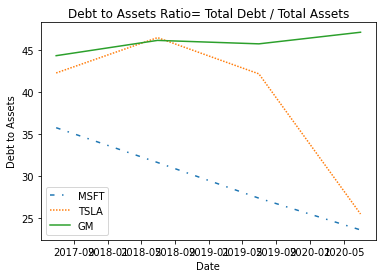

In [910]:
#search linestyles for different styles
plt.plot(df_joined['asOfDate'],df_joined['Debt/Assets'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Debt/Assets'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Debt/Assets'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Debt to Assets')
plt.title('Debt to Assets Ratio= Total Debt / Total Assets')

Text(0, 0.5, 'Debt to Equity')

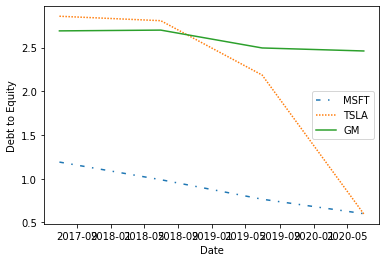

In [911]:
plt.plot(df_joined['asOfDate'],df_joined['Debt/Equity'], label = t1.upper(), linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Debt/Equity'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Debt/Equity'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Debt to Equity')

Text(0, 0.5, 'Asset to Equity')

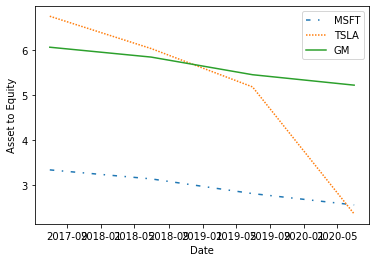

In [912]:
plt.plot(df_joined['asOfDate'],df_joined['Asset/Equity'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Asset/Equity'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Asset/Equity'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Asset to Equity')

Text(0, 0.5, 'Gross Margin')

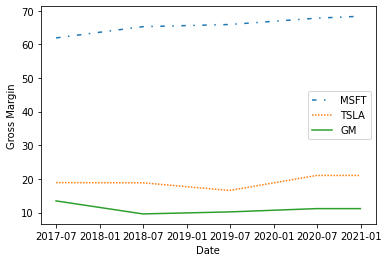

In [913]:
plt.plot(df_joined['asOfDate'],df_joined['Gross_Margin'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Gross_Margin'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Gross_Margin'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Gross Margin')

In [914]:
#Format the date for graphing
#ticker_income['Date'] = ticker_income['asOfDate'].dt.strftime('%m-%Y')
#ticker_income2['Date'] = ticker_income2['asOfDate'].dt.strftime('%m-%Y')
#ticker_income3['Date'] = ticker_income3['asOfDate'].dt.strftime('%m-%Y')

Text(0, 0.5, 'Return on Equity')

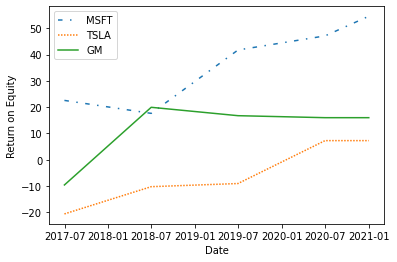

In [915]:
plt.plot(ticker_income['asOfDate'],ticker_income['ROE'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(ticker_income['asOfDate'],ticker_income2['ROE'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(ticker_income['asOfDate'],ticker_income3['ROE'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Return on Equity')

Text(0, 0.5, 'Operating Profit Margin')

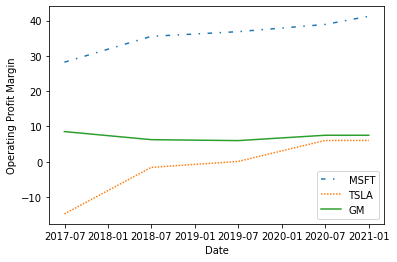

In [916]:
plt.plot(df_joined['asOfDate'],df_joined['Operating_Margin'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Operating_Margin'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Operating_Margin'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Operating Profit Margin')

Text(0, 0.5, 'Interest Coverage')

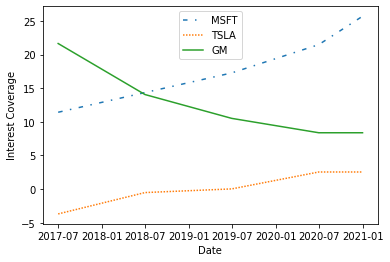

In [917]:
plt.plot(df_joined['asOfDate'],df_joined['Interest_coverage'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Interest_coverage'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Interest_coverage'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Interest Coverage')

Text(0, 0.5, 'Cash Coverage')

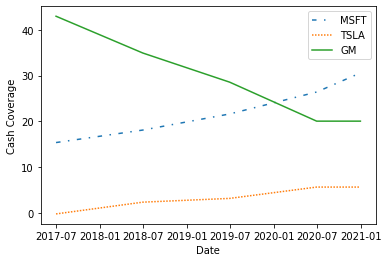

In [918]:
plt.plot(ticker_income['asOfDate'],ticker_income['Cash_coverage'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(ticker_income['asOfDate'],ticker_income2['Cash_coverage'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(ticker_income['asOfDate'],ticker_income3['Cash_coverage'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cash Coverage')

In [919]:
#ticker_Bal['Date'] = ticker_Bal['asOfDate'].dt.strftime('%m-%Y')
#ticker_Bal2['Date'] = ticker_Bal2['asOfDate'].dt.strftime('%m-%Y')
#ticker_Bal3['Date'] = ticker_Bal3['asOfDate'].dt.strftime('%m-%Y')

Text(0, 0.5, 'Asset Coverage')

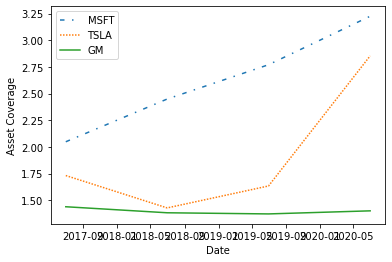

In [920]:
plt.plot(ticker_Bal['asOfDate'],ticker_Bal['Asset_coverage'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(ticker_Bal['asOfDate'],ticker_Bal2['Asset_coverage'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(ticker_Bal['asOfDate'],ticker_Bal3['Asset_coverage'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Asset Coverage')

Text(0, 0.5, 'Current Ratio')

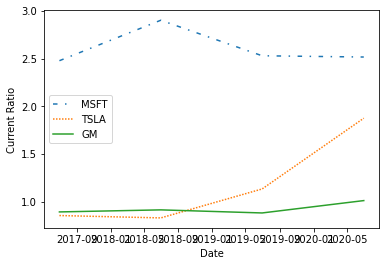

In [921]:
plt.plot(df_joined['asOfDate'],df_joined['Current_ratio'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Current_ratio'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Current_ratio'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Current Ratio')

Text(0, 0.5, 'Cash Ratio')

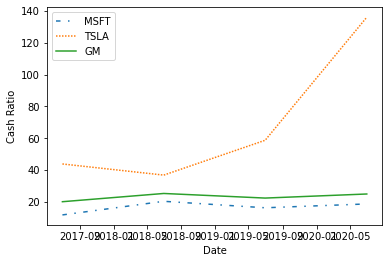

In [922]:
plt.plot(df_joined['asOfDate'],df_joined['Cash_ratio'], label = t1.upper(),linestyle = (0, (3, 5, 1, 5)))
plt.plot(df_joined['asOfDate'],df_joined2['Cash_ratio'], label = t2.upper(),linestyle = (0, (1, 1)))
plt.plot(df_joined['asOfDate'],df_joined3['Cash_ratio'], label = t3.upper())
plt.legend()
plt.xlabel('Date')
plt.ylabel('Cash Ratio')

In [923]:
ticker1_price = ticker.history()
ticker2_price = ticker2.history()
ticker3_price = ticker3.history()
print(ticker1_price['open'].tail(),ticker2_price['open'].tail(),ticker3_price['open'].tail())

symbol  date      
msft    2021-03-04    226.740005
        2021-03-05    229.520004
        2021-03-08    231.369995
        2021-03-09    232.880005
        2021-03-10    237.000000
Name: open, dtype: float64 symbol  date      
tsla    2021-03-04    655.799988
        2021-03-05    626.059998
        2021-03-08    600.549988
        2021-03-09    608.179993
        2021-03-10    700.299988
Name: open, dtype: float64 symbol  date      
gm      2021-03-04    52.990002
        2021-03-05    52.590000
        2021-03-08    54.290001
        2021-03-09    55.360001
        2021-03-10    55.000000
Name: open, dtype: float64


In [924]:
#It tells you how many dollars you must pay for each dollar of annual earnings.
ticker1_EPS = ticker_income['DilutedEPS'].head(3).tail(1)
ticker2_EPS = ticker_income2['DilutedEPS'].head(3).tail(1)
ticker3_EPS = ticker_income3['DilutedEPS'].head(3).tail(1)

ticker1_price['roll_PE'] = ticker1_price['open']/ ticker1_EPS 
ticker2_price['roll_PE'] = ticker2_price['open']/ ticker2_EPS
ticker3_price['roll_PE'] = ticker3_price['open']/ ticker3_EPS
print(ticker1_price['roll_PE'].tail(6),ticker2_price['roll_PE'].tail(6),ticker3_price['roll_PE'].tail(6))


symbol  date      
msft    2021-03-03    45.881424
        2021-03-04    44.810278
        2021-03-05    45.359685
        2021-03-08    45.725295
        2021-03-09    46.023716
        2021-03-10    46.837945
Name: roll_PE, dtype: float64 symbol  date      
tsla    2021-03-03   -699.176819
        2021-03-04   -666.463402
        2021-03-05   -636.239835
        2021-03-08   -610.315028
        2021-03-09   -618.069098
        2021-03-10   -711.686979
Name: roll_PE, dtype: float64 symbol  date      
gm      2021-03-03    11.925602
        2021-03-04    11.595186
        2021-03-05    11.507659
        2021-03-08    11.879650
        2021-03-09    12.113786
        2021-03-10    12.035011
Name: roll_PE, dtype: float64
